## Participants
* Samantha
* Rachelle
* Andrew

## Résumé des observations

Ce jeu de données comprend 9 colonnes et 48 459 150 lignes



# <div style='color:white;background: #005792;text-align: center;padding: 15px 0'>Recommandations - Visualisation de la source de données Title basics</div>

### Installation des librairies

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly-express
# !pip install plotly

### Importation des librairies

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns

import re

### Chargement des fichiers

In [2]:
source_dir= '/home/dstrec/dstrec/010_data/000_source/imdb_datasets'
name_file= 'title.basics.tsv'
file_path= f"{source_dir}/{name_file}"

df = pd.read_csv(file_path, sep='\t', na_values='\\N', low_memory=False, chunksize = 100000)

df = pd.concat(df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10790736 entries, 0 to 10790735
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   isAdult         float64
 5   startYear       float64
 6   endYear         float64
 7   runtimeMinutes  object 
 8   genres          object 
dtypes: float64(3), object(6)
memory usage: 740.9+ MB


### Visualisation de la part de non renseigné de chaque variable du fichier

DataVisualisation de la variable  tconst
Cette variable a  10790736  valeurs distintes
Cette variable ne contient pas de données non renseignées 

DataVisualisation de la variable  titleType
Cette variable a  11  valeurs distintes
Cette variable ne contient pas de données non renseignées 

DataVisualisation de la variable  primaryTitle
Cette variable a  4858622  valeurs distintes


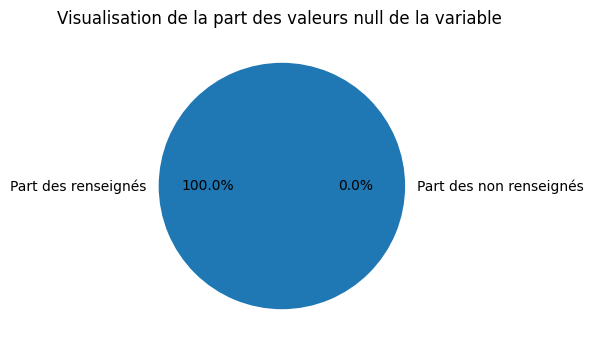

DataVisualisation de la variable  originalTitle
Cette variable a  4882235  valeurs distintes


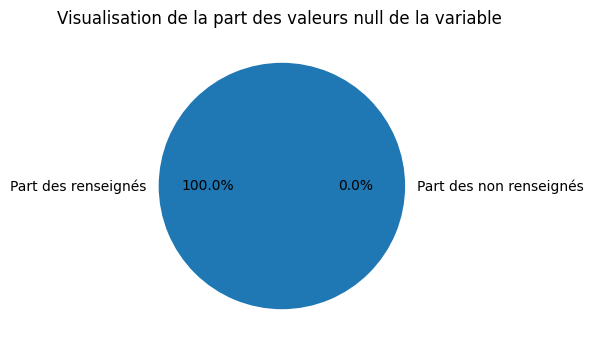

DataVisualisation de la variable  isAdult
Cette variable a  37  valeurs distintes


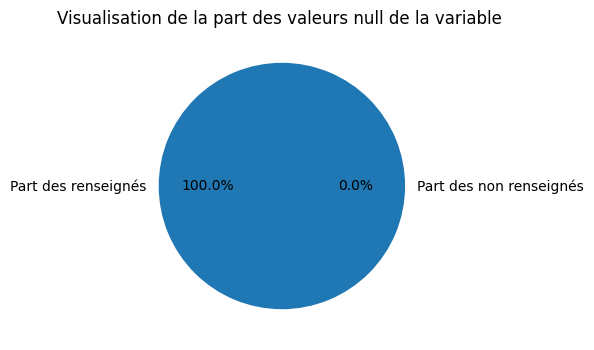

DataVisualisation de la variable  startYear
Cette variable a  152  valeurs distintes


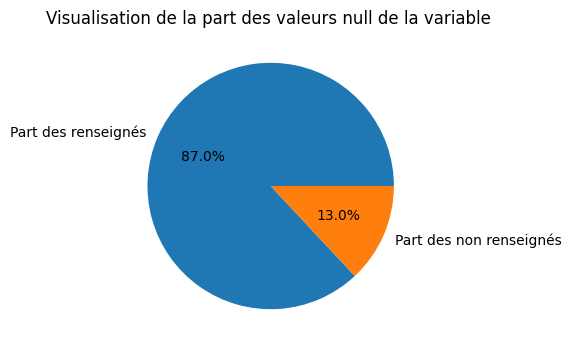

DataVisualisation de la variable  endYear
Cette variable a  97  valeurs distintes


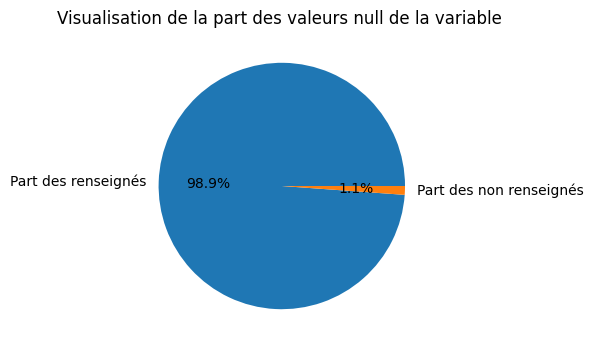

DataVisualisation de la variable  runtimeMinutes
Cette variable a  1473  valeurs distintes


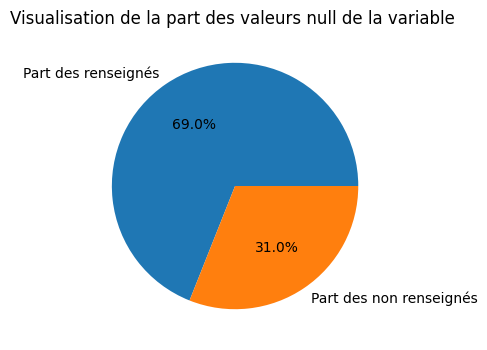

DataVisualisation de la variable  genres
Cette variable a  2373  valeurs distintes


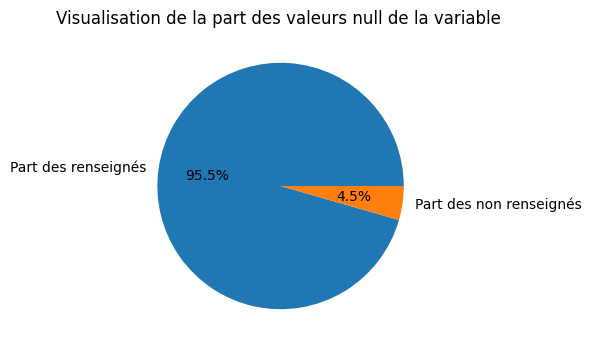

In [5]:
#Visualisation de la part de non renseigné de chaque variable du fichier
########################################################################""
for i in df.columns.values:
    print("DataVisualisation de la variable ",i)
    print("Cette variable a ",len(df[i].unique())," valeurs distintes")    
    if df[i].isna().sum()>0:
       res= df[i].isnull().value_counts(normalize = "true")
       plt.figure(figsize = (4, 4))
       plt.pie(res, labels = ['Part des renseignés', 'Part des non renseignés'], autopct='%1.1f%%')
       plt.title("Visualisation de la part des valeurs null de la variable ")
       plt.show()
    else:
        print("Cette variable ne contient pas de données non renseignées","\n")

### Autres visualisations

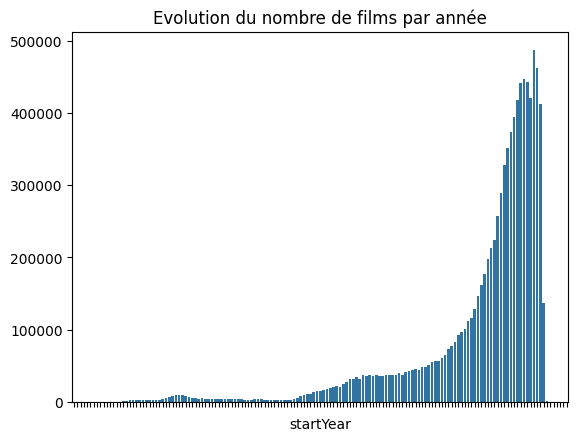

In [4]:
#Evolution du nombre de film par année
#######################################
ax = sns.barplot(y=df['startYear'].value_counts(sort=False).head(200).values,
            x=df['startYear'].value_counts(sort=False).head(200).index)
ax.set(xticklabels=[])
plt.title("Evolution du nombre de films par année")
#plt.xlabel('Note moyenne')
#plt.ylabel('Somme des votes (en million)')
plt.show()

Cette visualisation n'est pas exploitable car trop d'année

Il faut regrouper les données par tranches d'années

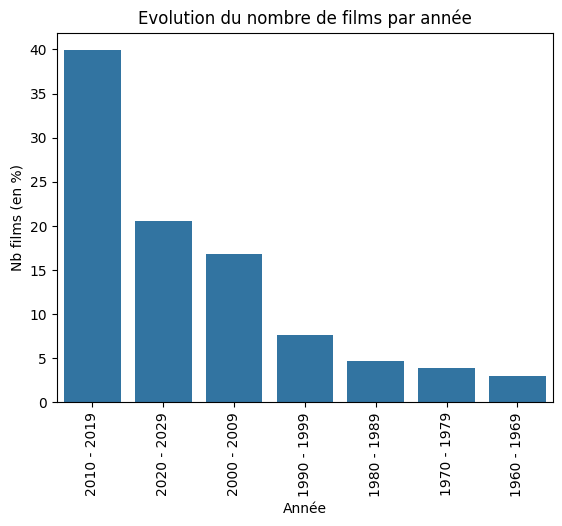

In [5]:
df['groupYear'] = df['startYear'].apply(lambda x: "< 1950" if x < 1949 
                                              else "1950 - 1959" if x>=1950 and x<=1959
                                              else "1960 - 1969" if x>=1960 and x<=1969
                                              else "1970 - 1979" if x>=1970 and x<=1979
                                              else "1980 - 1989" if x>=1980 and x<=1989
                                              else "1990 - 1999" if x>=1990 and x<=1999
                                              else "2000 - 2009" if x>=2000 and x<=2009
                                              else "2010 - 2019" if x>=2010 and x<=2019
                                              else "2020 - 2029" if x>=2020 and x<=2029
                                              else np.nan)

#Evolution du nombre de film par année
#######################################
ax = sns.barplot(y=df['groupYear'].value_counts(normalize=True).head(7).values*100,
            x=df['groupYear'].value_counts(normalize=True).head(7).index)
ax.tick_params(axis='x', rotation=90)
plt.title("Evolution du nombre de films par année")
plt.xlabel('Année')
plt.ylabel('Nb films (en %)')
plt.show()

Beaucoup de films récents

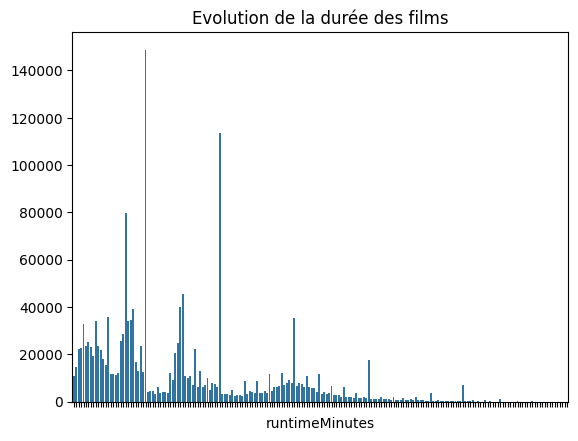

In [7]:
#Evolution de la durée des films
#######################################
ax = sns.barplot(y=df['runtimeMinutes'].value_counts(sort=False).head(200).values,
            x=df['runtimeMinutes'].value_counts(sort=False).head(200).index)
ax.set(xticklabels=[])
plt.title("Evolution de la durée des films")
plt.show()

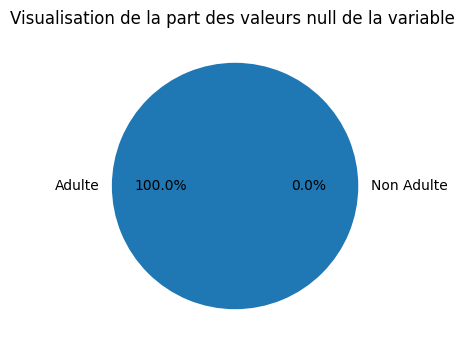

In [9]:
plt.figure(figsize = (4, 4))
plt.pie(df['isAdult'].isnull().value_counts(normalize = "true"), labels = ['Adulte', 'Non Adulte'], autopct='%1.1f%%')
plt.title("Visualisation de la part des valeurs null de la variable ")
plt.show()

Text(0, 0.5, 'Part (en %)')

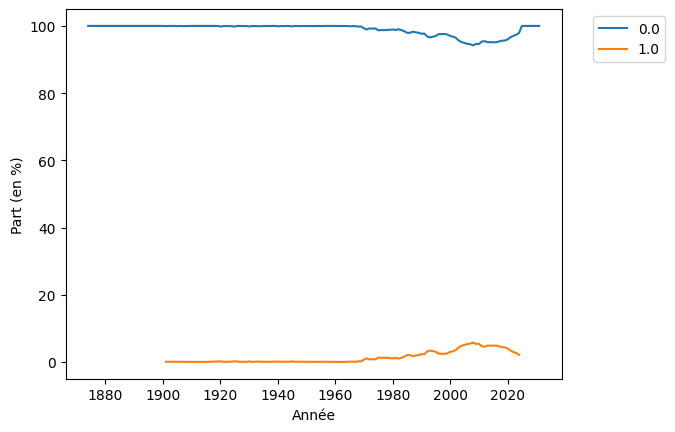

In [7]:
res=pd.DataFrame(df.groupby('startYear')['isAdult'].value_counts(normalize = 'true')*100)

sns.lineplot(x='startYear', y='proportion', hue='isAdult', data=res)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Année')
plt.ylabel('Part (en %)')

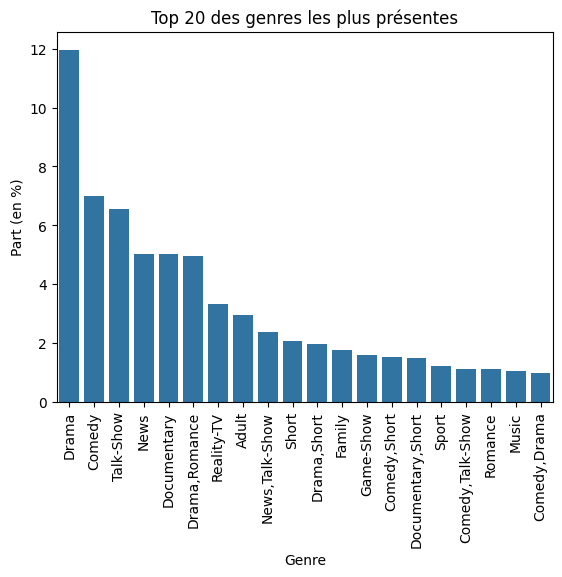

In [4]:
#Genres les plus présentes
###############################
ax = sns.barplot(y=df['genres'].value_counts(normalize=True).head(20).values*100,
            x=df['genres'].value_counts(normalize=True).head(20).index)
ax.tick_params(axis='x', rotation=90)
plt.title("Top 20 des genres les plus présentes")
plt.xlabel('Genre')
plt.ylabel('Part (en %)')
plt.show()

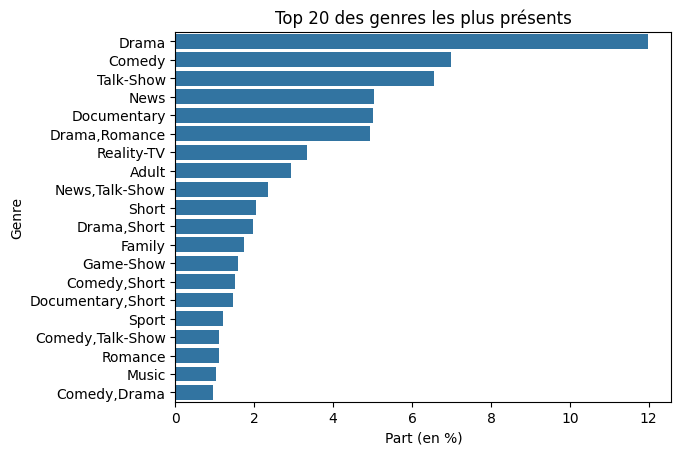

In [5]:
ax = sns.barplot(x=df['genres'].value_counts(normalize=True).head(20).values*100,
                 y=df['genres'].value_counts(normalize=True).head(20).index)
ax.tick_params(axis='y', rotation=0)
plt.title("Top 20 des genres les plus présents")
plt.xlabel('Part (en %)')
plt.ylabel('Genre')
plt.show()
